DATA SUSENAS 2013 KELOMPOK RUMAH TANGGA

Analisis Kepemilikan tempat tinggal rumah tangga Indonesia 2013

**READ DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rumah = pd.read_csv('sn13_krt.csv',)

rumah = rumah[['b1r1','b1r5','b2r1','b6r1','b6r2','b6r3','b6r5','b6r6','b6r7','exp_cap','wert']]
rumah.columns = ['prov','desa_kota','anggota_rt','tipe_bangunan','jumlah_rt','status_milik','atap','dinding','lantai','exp_cap','bobot']

saya akan gunakan beberapa variabel di atas yang sudah saya ganti namanya. Awalnya masih menggunakan status kepemilikan rumah saja, nanti akan menggunakan variabel lain untuk menganalisis kualitas rumah.

In [3]:
total = rumah.isnull().sum().sort_values(ascending=False)
percent = (rumah.isnull().sum()/rumah.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bobot,0,0.0
exp_cap,0,0.0
lantai,0,0.0
dinding,0,0.0
atap,0,0.0
status_milik,0,0.0
jumlah_rt,0,0.0
tipe_bangunan,0,0.0
anggota_rt,0,0.0
desa_kota,0,0.0


Data sudah bersih dan tidak ada missing value.

**CLEANSING DATA**

In [4]:
#memberi label desa atau kota
rumah.loc[rumah['desa_kota']==1,'desa_kota']='kota'
rumah.loc[rumah['desa_kota']==2,'desa_kota']='desa'

#memberi label kepemilikan rumah
rumah.loc[rumah['status_milik']==1,'kepemilikan']=1
rumah.loc[rumah['status_milik']==2,'kepemilikan']=0
rumah.loc[rumah['status_milik']==3,'kepemilikan']=0
rumah.loc[rumah['status_milik']==4,'kepemilikan']=0
rumah.loc[rumah['status_milik']==5,'kepemilikan']=0
rumah.loc[rumah['status_milik']==6,'kepemilikan']=0
rumah.loc[rumah['status_milik']==7,'kepemilikan']=0

#memberi label untuk jawa dan non-jawa

Guna untuk visualisasi analisis saya ganti nilai variabelnya supaya langsung terlihat labelnya.

Sedikit mengenai kepemilikan rumah. label 1 merupakan milik sendiri, sedangkan 2 - 7 bukan milik sendiri(sewa/kontrak/bebas sewa/dinas). Mengapa yang lain saya kategorikan bukan_milik_sendiri? karena dengan memiliki sendiri lebih menunjukan kemampuan ekonomi. kemungkinan lain yang tidak bisa dilihat mungkin jika kepemilikan itu berasal dari hak waris.

In [5]:
#perhitungan bobot
wt_sum = lambda x: np.sum(x, weights=rumah.loc[x.index, "bobot"])
wt_mean = lambda x: np.average(x, weights=rumah.loc[x.index, "bobot"])


**Analisis tingkat kepemilikan tempat tinggal pada rumah tangga Nasional**

1. Hipotesis pertama adalah seberapa banyak tingkat kepemilikan tempat tinggal yang dimiliki sendiri oleh sebuah rumah tangga. Apakah rumah tangga di Indonesia lebih banyak yang memiliki tempat tinggal sendiri atau menyewa(kontrak)

In [6]:
rumah_milik = rumah.groupby("kepemilikan").agg(kepemilikan = ("kepemilikan", "count"), bobot = ("bobot", "sum"))
rumah_milik.reset_index(drop=True).astype(int)

,kepemilikan,bobot
0,13482,13323751
1,57360,49827226


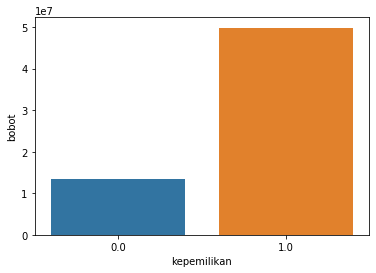

In [7]:
#data yang menampilkan tingkat kempemilikikan rumah nasional
sns.barplot(x=rumah_milik["kepemilikan"].index, y=rumah_milik["bobot"])

Dari pemaparan analisis di atas, diketahui rumah tangga di Indonesia lebih banyak yang memiliki tempat tinggal sendiri ketimbang yang tidak memiliki memiliki. Akan tetapi angka yang tidak memiliki masih cukup tinggi, sekitar 21% dari total rumah tangga masih tidak memiliki tempat tinggal sendiri.

In [8]:
a = rumah_milik["bobot"].loc[0]
b = rumah_milik["bobot"].loc[1]
prcntg = (a/(a+b))*100

print("Presentase dari rumah tangga yang tidak memiliki rumah keseluruhan: ", prcntg)

Presentase dari rumah tangga yang tidak memiliki rumah keseluruhan:  21.098250661047047


2. Sekarang mari kita coba lihat bagaimana perbandingan kepemilikan rumah di desa dengan kota.

In [9]:
#Perbandingan kepemilikan desa dan kota
rumah_urban = rumah.groupby([ "desa_kota","kepemilikan"]).agg(desa_kota = ("desa_kota", "count"),
                                             kepemilikan = ("kepemilikan", "count"),
                                             bobot = ("bobot", "sum"))
rumah_urban.astype(int)

desa_kota  kepemilikan     bobot
desa_kota kepemilikan                                  
desa      0.0               4819         4819   3874197
          1.0              35547        35547  27994185
kota      0.0               8663         8663   9449553
          1.0              21813        21813  21833040

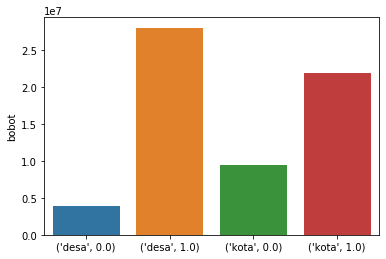

In [10]:
sns.barplot(x=rumah_urban["desa_kota"].index, y=rumah_urban["bobot"])

Temuan pada perbandingan tersebut cukup menarik dimana jumlah rumah tangga pedesaan lebih sedikit yang tidak memiliki rumah sendiri dibandingkan dengan perkotaan. Jika kita lihat angkanya, hampir separuh populasi di perkotaan tidak memiliki sendiri. Faktor penyebab ketimpangan ini mungkin bisa dilihat dari harga rumah di perkotaan yang lebih tinggi dan kepadatan penduduk di perkotaan.

3. perbandingan tingkat kepemilikan rumah di pulau jawa dan non-jawa

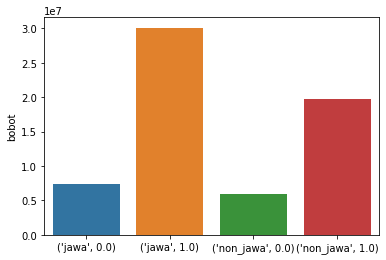

In [11]:
def perov(x):
        if x > 30 and x < 40:
            return "jawa"
        else:
            return "non_jawa"

rumah["pulau_jawa"] = rumah[["prov"]].applymap(perov)
rumah_prov = rumah.groupby(["pulau_jawa","kepemilikan"]).agg(pulau_jawa = ("pulau_jawa", "count"),
                                                             bobot = ("bobot", "sum"))
sns.barplot(x=rumah_prov["pulau_jawa"].index, y=rumah_prov["bobot"])

Tentu saja kepemilikan rumah pada rumah tangga di pulau jawa tinggi karena lebih padat. Menariknya adalah di luar pulau jawa tingkat kepemilikan rumah juga rendah jika kita rasiokan antara rumah tangga yang punya rumah dengan yang tidak punya. secara aggregat hampir sama dengan penduduk yang lebih sedikit.

4. Kualitas bangunan rumah secara sederhana

pertama kita akan mengkategorikan setiap kolom yang menggambarkan kualitas rumah (atap, dinding, dan lantai) yang digunakan ke dalam definisi kualitas material yang baik (1) dan buruk (0).
 - pertama atap. nilai 1 - 7 menggambarkan secara berurutan Beton, Genteng, Sirap, Seng, Asbes, Ijuk/Rumbi, dan lainnya. Saya akan kategorikan nomer 1-3 sebagai material yang baik dan selebihnya buruk.
 - kedua dinding. nilai 1 - 4 menggambarkan secara berurutan Tembok, Kayu, Bambu, dan lainnya. Saya akan kategorikan nomor 1 saja sebagai material yang baik, selebihnya buruk
 - ketiga lantai.  nilai 1 - 6 menggambarkan secara berurutan marmer/keramik/granit, tegel/teraso, semen, kayu, tanah, dan lainnya. Saya akan kategorikan nomor 1 - 2 sebagai material yang baik, selebihnya buruk.

In [24]:
#On process

5. korelasi antara pengeluaran dengan tingkat kepemilikan rumah

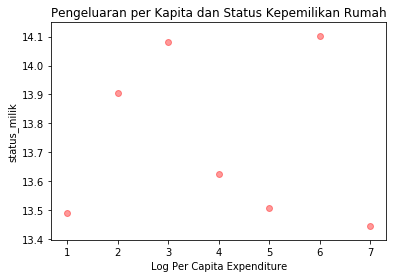

In [12]:
rumah_bb = rumah.groupby(["status_milik"]).agg(exp = ("exp_cap", wt_mean), bobot = ("bobot", "sum"))

# Log Pengeluaran per Kapita
x_pce = rumah_bb["bobot"].index
y_pce = np.log(rumah_bb["exp"])

# Plot
plt.scatter(x_pce, y_pce, alpha=0.4, c='red')
plt.title('Pengeluaran per Kapita dan Status Kepemilikan Rumah')
plt.xlabel('Log Per Capita Expenditure')
plt.ylabel('status_milik')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

- Sekilas terlihat bahwa rumah tangga yang memiliki rumah belum tentu memiliki pendapatan tinggi (kita gunakan pengeluaran sebagai tolok ukur kekuatan ekonomi).
- Terlihat bahwa rumah tangga yang sewa, kontrak, dan memiliki rumah dinas memiliki tingkat pendapatan yang lebih tinggi
- poin 4 & 5 merupakan rumah tangga yang bebas tinggal dan bebas sewa, sedangkan 7 lain-lain

**Pesebaran Data status milik dengan Expenditure Cap (log)**

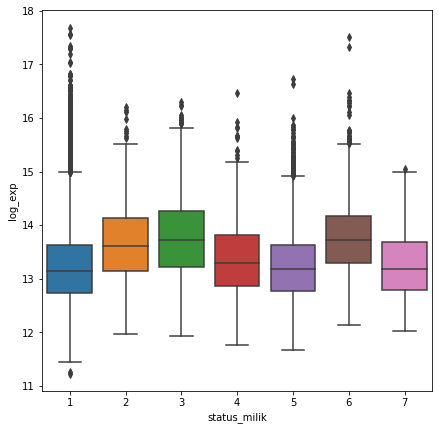

In [17]:
rumah["log_exp"] = np.log(rumah["exp_cap"])
sns.boxplot(x="status_milik", y="log_exp", data=rumah)

- Jika dilihat dari plot sebelumnya (scatter) bahwa rerata pendapatan orang yang memiliki rumah memang rendah, tapi jika kita lihat dengan boxplot terdapat banyak outliers pada status milik = 1, atau rumah dengan milik sendiri.
- Untuk status kepemilikan lain yang memiliki banyak outliers ada pada status kepemilikan 5 (bebas sewa milik keluarga), dan 6 (rumah dinas). Jika seseorang (biasanya ASN) mendapat rumah dinas, bisa dikatakan memiliki pendapatan atau tingkat pengeluaran yang cukup tinggi, seperti ditunjukan pada tabel. Bahkan bisa dikatakan hampir sama tinggi dengan yang paling tinggi, Nomor 3 (sewa)

jika kita coba membuat boxplot di atas dengan membandingkan yang berada di pulau jawa dan non jawa.

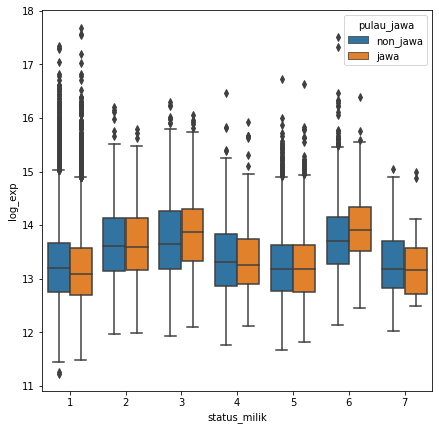

In [23]:
sns.boxplot(x="status_milik", y="log_exp", hue="pulau_jawa", data=rumah)

tidak terdapat banyak perbedaan, hanya pada nomor 3 (sewa) dan nomor 6 (rumah dinas)